In [1]:
import numpy as np
from tensorflow.keras.utils import to_categorical
# CIFAR-10 Dataset을 가져오기 위한 라이브러리
from keras.datasets import cifar10

# CIFAR-10 Dataset을 가져오기 위한 라이브러리
from keras.datasets import cifar10
# 순차적인 모델을 만들기 위한 Sequential 함수
from keras.models import Sequential
# 필요한 층들을 가지고 있는 layers 라이브러리
from keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten
# Google Colab에서 이미지를 보기 위한 cv2_imshow 함수
from google.colab.patches import cv2_imshow
from keras.layers import Dense, Flatten


170498071/170498071 [==============================] - 4s 0us/step
x_train : (50000, 32, 32, 3)
y_train : (50000, 1)
x_test : (10000, 32, 32, 3)
y_test : (10000, 1)


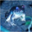

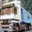

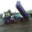

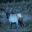

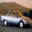

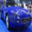

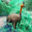

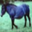

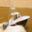

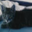

In [2]:
# CIFAR-10 Dataset 가져오기
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train :', np.shape(x_train))
print('y_train :', np.shape(y_train))
print('x_test :', np.shape(x_test))
print('y_test :', np.shape(y_test))
# 한 번 Training Dataset의 이미지 10개 정도 봅시다
for i in range(10):
  cv2_imshow(x_train[i])

In [3]:
# Loss의 스케일 조정을 위해 0 ~ 255 -> 0 ~ 1 범위로 만들어줍니다
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# 이번엔 Test Dataset을 Validation Set으로 써봅니다
# One-Hot Encoding (숫자 -> One-Hot Vector)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print('y_train :', np.shape(y_train))

y_train : (50000, 10)


## NN으로 학습

In [7]:
# 입력 데이터의 차원 (예: MNIST 데이터셋의 경우 28x28)
input_shape = x_train.shape[1:]

# 신경망 모델 구성
model = Sequential()
model.add(Flatten(input_shape=input_shape))  # Flatten layer는 이미지 데이터를 1차원으로 변환합니다.
model.add(Dense(128, activation='relu'))     # 은닉층 (128개의 노드)
model.add(Dense(10, activation='softmax'))   # 출력층 (클래스가 10개인 경우)

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.9059 - accuracy: 0.3166 - val_loss: 1.7658 - val_accuracy: 0.3689
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.7414 - accuracy: 0.3799 - val_loss: 1.6986 - val_accuracy: 0.3921
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6770 - accuracy: 0.4043 - val_loss: 1.6781 - val_accuracy: 0.3989
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6410 - accuracy: 0.4146 - val_loss: 1.6187 - val_accuracy: 0.4276
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6216 - accuracy: 0.4252 - val_loss: 1.6189 - val_accuracy: 0.4215
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6006 - accuracy: 0.4311 - val_loss: 1.6053 - val_accuracy: 0.4300
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5861 - accuracy: 0.4350 - val_loss: 1.5794 - val_accurac

## CNN으로 학습

In [8]:
# 모델 구성하기
# 높이, 너비, 채널(RGB) 설정
width = 32
height = 32
channel = 3
# 순차적 모델을 만들기 위한 Sequential() 함수
model = Sequential(name='CIFAR10_CNN')
# filters : Kernel 그룹의 갯수 / kernel_size : Kernel 크기
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu',
                 input_shape=(width, height, channel)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
# pool_size : MaxPooling 의 Window size
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# N차원 배열을 1차원으로 펴줍니다
model.add(Flatten())
# 출력층 MLP
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "CIFAR10_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                  

In [9]:
# 모델 학습과정 설정하기
# loss : 목적 함수
# categorical_crossentropy : 분류가 2개 이상인 CEE
# optimizer : 학습 방법, SGD를 사용합니다.
# metrics : 학습 도중 화면에 어떤 값을 띄울까를 결정합니다.
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# 모델 학습시키기
# hist는 Epoch 당 학습 결과를 갖게 됩니다.
hist = model.fit(x_train, y_train,
                 epochs=30,
                 batch_size=32,
                 validation_data=(x_test, y_test))

Epoch 1/30
1563/1563 [==============================] - 12s 7ms/step - loss: 2.0591 - accuracy: 0.2477 - val_loss: 1.8813 - val_accuracy: 0.3348
Epoch 2/30
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6080 - accuracy: 0.4262 - val_loss: 1.4691 - val_accuracy: 0.4733
Epoch 3/30
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4128 - accuracy: 0.4998 - val_loss: 1.4376 - val_accuracy: 0.4887
Epoch 4/30
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2888 - accuracy: 0.5448 - val_loss: 1.3349 - val_accuracy: 0.5215
Epoch 5/30
1563/1563 [==============================] - 10s 7ms/step - loss: 1.1818 - accuracy: 0.5837 - val_loss: 1.2547 - val_accuracy: 0.5619
Epoch 6/30
1563/1563 [==============================] - 10s 7ms/step - loss: 1.0841 - accuracy: 0.6203 - val_loss: 1.2461 - val_accuracy: 0.5603
Epoch 7/30
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9970 - accuracy: 0.6522 - val_loss: 1.1023 - val_ac

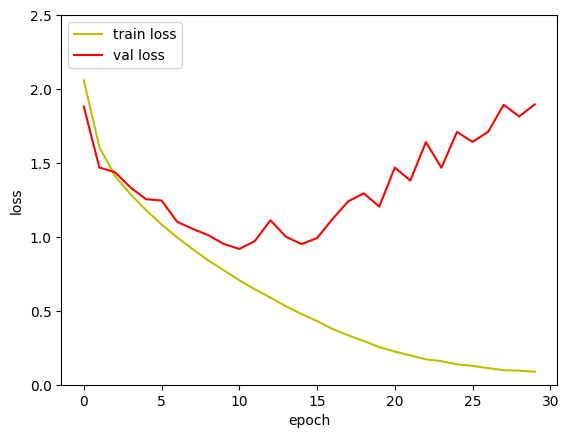

In [10]:
# 그래프를 그리기 위한 matplotlib 라이브러리
import matplotlib.pyplot as plt
# Training Loss VS Validation Loss 비교를 위한 그래프 그리기
plt.plot(hist.history['loss'], 'y', label='train loss')
plt.plot(hist.history['val_loss'], 'r', label='val loss')
# y축 범위 설정
plt.ylim([0.0, 2.5])
# 각 축의 이름 정하기
plt.xlabel('epoch')
plt.ylabel('loss')
# 각 그래프의 설명 위치 설정 후 표시
plt.legend(loc='upper left')
plt.show()

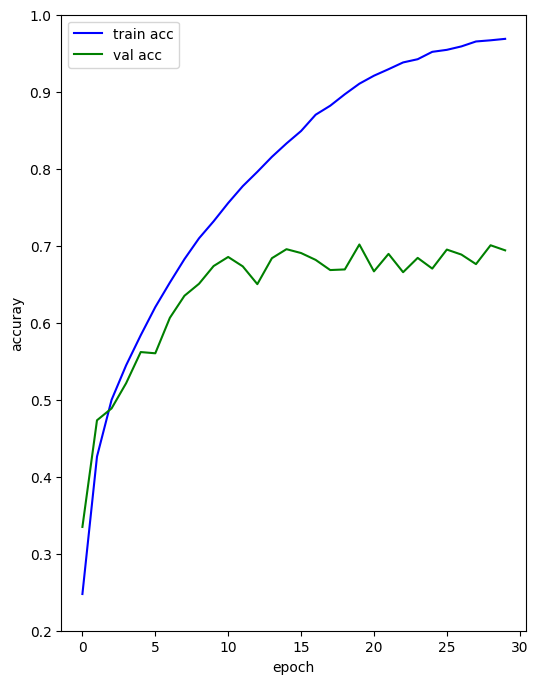

In [11]:
# Training Accuracy VS Validation Accuracy 비교를 위한 그래프 그리기
plt.figure(figsize=(6,8))
plt.plot(hist.history['accuracy'], 'b', label='train acc')
plt.plot(hist.history['val_accuracy'], 'g', label='val acc')
# y축 범위 설정
plt.ylim([0.2, 1.0])
# 각 축의 이름 정하기
plt.xlabel('epoch')
plt.ylabel('accuray')
# 각 그래프의 설명 위치 설정 후 표시
plt.legend(loc='upper left')
# 그래프 그리기
plt.show()

In [12]:
#모델 평가
loss_and_acc = model.evaluate(x_test, y_test, batch_size=32)
print('Test set Loss and Accuracy')
print(loss_and_acc)

313/313 [==============================] - 1s 3ms/step - loss: 1.8962 - accuracy: 0.6940
Test set Loss and Accuracy
[1.896155834197998, 0.6940000057220459]


1/1 [==============================] - 1s 825ms/step
예측: 고양이 / 정답: 고양이


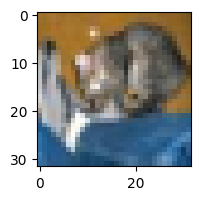

1/1 [==============================] - 0s 18ms/step
예측: 배 / 정답: 배


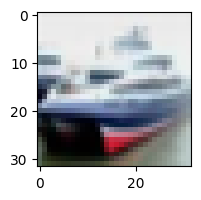

1/1 [==============================] - 0s 33ms/step
예측: 배 / 정답: 배


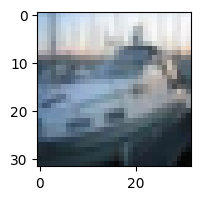

1/1 [==============================] - 0s 26ms/step
예측: 비행기 / 정답: 비행기


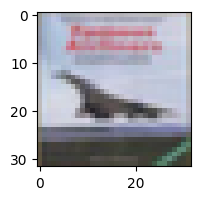

1/1 [==============================] - 0s 27ms/step
예측: 사슴 / 정답: 개구리


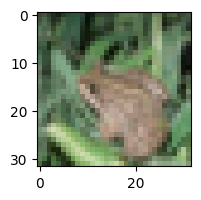

1/1 [==============================] - 0s 26ms/step
예측: 개구리 / 정답: 개구리


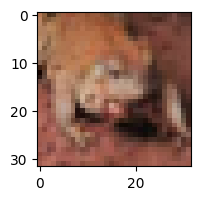

1/1 [==============================] - 0s 30ms/step
예측: 트럭 / 정답: 자동차


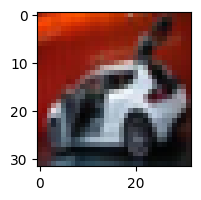

1/1 [==============================] - 0s 46ms/step
예측: 새 / 정답: 개구리


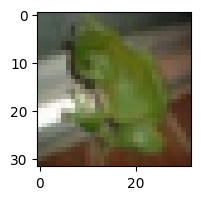

1/1 [==============================] - 0s 28ms/step
예측: 사슴 / 정답: 고양이


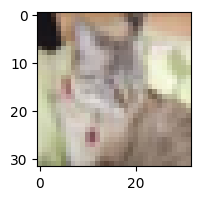

1/1 [==============================] - 0s 27ms/step
예측: 자동차 / 정답: 자동차


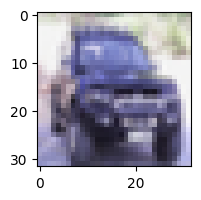

In [13]:
#모델 사용하기
# 이미지의 종류가 무엇인지에 대한 리스트
labels = ['비행기', '자동차', '새', '고양이', '사슴', '개', '개구리', '말', '배', '트럭']
# 출력 그림의 크기를 결정합니다.
plt.rcParams["figure.figsize"] = (2,2)
# Test Set의 10개를 맞추어 봅시다.
for i in range(10):
  # 모델 사용
  output = model.predict(x_test[i].reshape(1,width, height, channel))

  # 이미지 출력
  plt.imshow(x_test[i].reshape(width, height, channel))
  # np.argmax()가 labels의 인덱스가 되어 labels 배열에 있는 문자열을 출력합니다.
  print('예측: ' + labels[np.argmax(output)] + ' / 정답: ' + labels[np.argmax(y_test[i])])
  plt.show()

## attempt2

In [14]:
# 모델 구성하기
# 높이, 너비, 채널(RGB) 설정
width = 32
height = 32
channel = 3
# 순차적 모델을 만들기 위한 Sequential() 함수
model = Sequential(name='CIFAR10_CNN')
# filters : Kernel 그룹의 갯수 / kernel_size : Kernel 크기
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu',
                 input_shape=(width, height, channel)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
# pool_size : MaxPooling 의 Window size
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# N차원 배열을 1차원으로 펴줍니다
model.add(Flatten())
# 출력층 MLP
model.add(Dense(10, activation='softmax'))
model.summary()

# 모델 학습과정 설정하기
# loss : 목적 함수
# categorical_crossentropy : 분류가 2개 이상인 CEE
# optimizer : 학습 방법, SGD를 사용합니다.
# metrics : 학습 도중 화면에 어떤 값을 띄울까를 결정합니다.
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# 모델 학습시키기
# hist는 Epoch 당 학습 결과를 갖게 됩니다.
hist = model.fit(x_train, y_train,
                 epochs=30,
                 batch_size=32,
                 validation_data=(x_test, y_test))

Model: "CIFAR10_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                  

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

# 모델 구성하기
width = 32
height = 32
channel = 3

model = Sequential(name='CIFAR10_CNN')

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(width, height, channel)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # 첫 번째 Dropout 계층

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # 두 번째 Dropout 계층

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

# Dense Layer
model.add(Dense(10, activation='softmax'))

model.summary()

# 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test))


Model: "CIFAR10_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_23 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_24 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_25 (Conv2D)          (None, 16, 16, 64)        36928     
                                                       

KeyboardInterrupt: ignored

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

# 모델 구성하기
width = 32
height = 32
channel = 3

model = Sequential(name='CIFAR10_CNN')

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(width, height, channel)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # 첫 번째 Dropout 계층

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # 두 번째 Dropout 계층

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

# Dense Layer
model.add(Dense(10, activation='softmax'))

model.summary()

# 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test))


Model: "CIFAR10_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_33 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_34 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_35 (Conv2D)          (None, 16, 16, 64)        36928     
                                                       

KeyboardInterrupt: ignored

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
import numpy as np

# 데이터 전처리
# x_train과 y_train은 CIFAR-10 데이터셋의 훈련 데이터와 라벨입니다.
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 데이터 증강
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# 모델 구성
model = Sequential(name='CIFAR10_CNN_Improved')

# Convolutional Layer + Batch Normalization
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# 모델 요약
model.summary()

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# 조기 중단 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# 모델 학습
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=100,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping])


Model: "CIFAR10_CNN_Improved"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_43 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 30, 30, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                              

KeyboardInterrupt: ignored

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.regularizers import l2
import numpy as np

# 데이터 전처리
# x_train과 y_train은 CIFAR-10 데이터셋의 훈련 데이터와 라벨입니다.
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 데이터 증강
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,  # 스케일 조정
    brightness_range=[0.8,1.2]  # 밝기 조정
)

# 모델 구성
model = Sequential(name='CIFAR10_CNN_Improved')

# Convolutional Layer + Batch Normalization with L2 Regularization
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))  # 드롭아웃 비율 조정

model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))  # 드롭아웃 비율 조정

model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))  # 드롭아웃 비율 조정

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# 모델 요약
model.summary()

# 모델 컴파일
optimizer = Adam(learning_rate=0.0001)  # 학습률 조정
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# 조기 중단 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=5)  # 인내심 조정

# 모델 학습
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=100,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping])


Model: "CIFAR10_CNN_Improved"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_49 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 batch_normalization_7 (Bat  (None, 30, 30, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                              